# MovieLens Dataset Movie Recommendation

## Import datasets

In [1]:
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv('./ratings.csv', sep=',', usecols=['userId', 'movieId', 'rating'])
df.head()

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5


In [10]:
movie_titles = pd.read_csv("./movies.csv", sep=',', usecols=['movieId', 'title'])
movie_titles.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [11]:
df = pd.merge(df,movie_titles,on='movieId')
df.head()

,userId,movieId,rating,title
0,1,296,5.0,Pulp Fiction (1994)
1,3,296,5.0,Pulp Fiction (1994)
2,4,296,4.0,Pulp Fiction (1994)
3,5,296,4.0,Pulp Fiction (1994)
4,7,296,4.0,Pulp Fiction (1994)


## Visualization

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [14]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Full of Grace (2015)            5.0
Geordie (1955)                  5.0
Garfield In Paradise (1986)     5.0
Lost Woods (2012)               5.0
Garfield in the Rough (1984)    5.0
Name: rating, dtype: float64

In [15]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 81491
Shawshank Redemption, The (1994)    81482
Pulp Fiction (1994)                 79672
Silence of the Lambs, The (1991)    74127
Matrix, The (1999)                  72674
Name: rating, dtype: int64

In [16]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000
"""Great Performances"" Cats (1998)",2.896648
#1 Cheerleader Camp (2010),2.111111
#Captured (2017),3.750000
#Female Pleasure (2018),3.666667


In [17]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000,1
"""Great Performances"" Cats (1998)",2.896648,179
#1 Cheerleader Camp (2010),2.111111,9
#Captured (2017),3.750000,2
#Female Pleasure (2018),3.666667,3


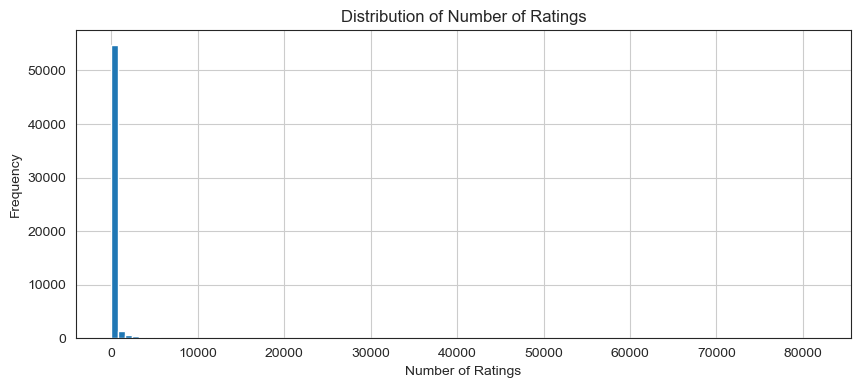

In [28]:
plt.figure(figsize=(10, 4))
ratings['num of ratings'].hist(bins=100)
plt.title('Distribution of Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

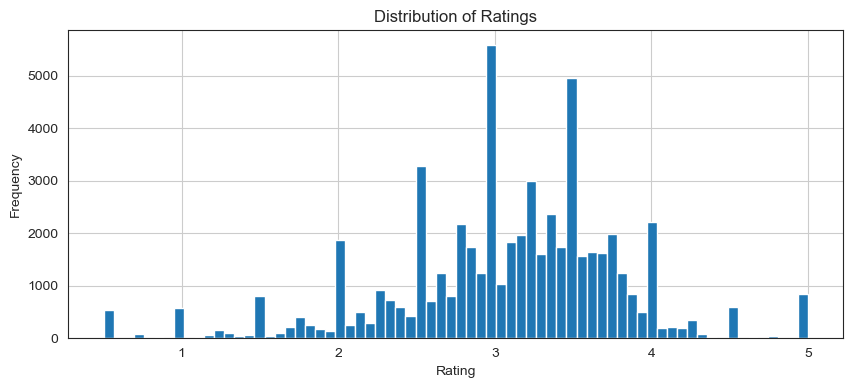

In [23]:
plt.figure(figsize=(10, 4))
ratings['rating'].hist(bins=70)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

c:\Users\hiaru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hiaru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


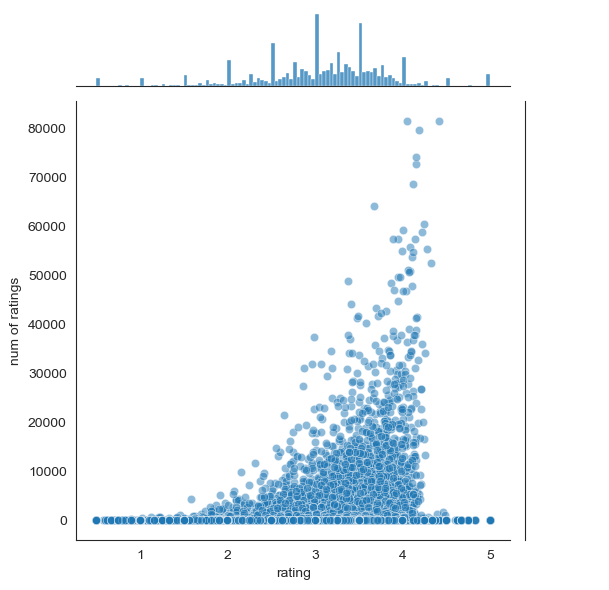

In [29]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

In [30]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

KeyError: 'user_id'